# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import probplot
from scipy.stats import normaltest

#set seaborn settings
sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 4)
sns.set_palette(palette)

df = pd.read_csv('data/human_body_temperature.csv')

In [84]:
#Set ecdf function for use
def ecdf(data):

    # Number of data points: n
    n = len(data)

    # x: sort the data
    x = np.sort(data)

    # y: range for y-axis
    y = np.arange(1, n+1) / n

    return x, y

In [40]:
#inspect data source
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.6+ KB


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [41]:
#inspect temperature data within df
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [42]:
#create temp specific data frame.
temperatures = df['temperature']

# 1. Is the distribution of body temperatures normal?
    Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

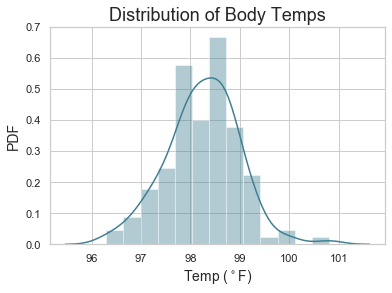

In [43]:
# Create distribution plot for temperature:
sns.distplot(temperatures)

# Label axes and add title:
plt.xlabel('Temp ($^\circ$F)', fontsize=14)
plt.ylabel('PDF', fontsize=14)
plt.title('Distribution of Body Temps', fontsize=18)

#show plot
plt.show()

In [44]:
#Perform a normal test on the temp data.
sk, p = normaltest(temperatures)
print(p)

0.2587479863488254


Since p > 0.05, we can accept the null hypothesis that sample of body temperatures is from a normal distribution. We can also display the normal distribution in a Q-Q plot.

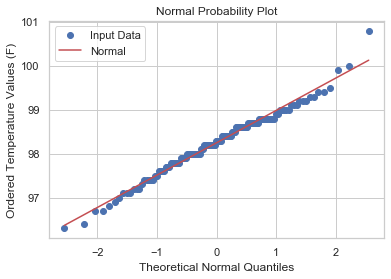

In [45]:
# Quantile-Quantile plot
_ = probplot(temperatures, dist='norm', plot=plt)
_ = plt.xlabel('Theoretical Normal Quantiles')
_ = plt.ylabel('Ordered Temperature Values (F)')
_ = plt.legend(['Input Data', 'Normal'])
_ = plt.title('Normal Probability Plot')

# 2. Is the sample size large? Are the observations independent?
    Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

Conditions for CLM:
        1. Samples must be independent. (since body temperature is from individuals, this can be assumed.
        2. Sample size must be greater than 30.

In [46]:
# Test CLT's sample size condition
if len(temperatures) < 30:
    print("The sample size is too small (n < 30)")
else:
    print("The sample size is large (n > 30)")

The sample size is large (n > 30)


# 3. Is the true population mean really 98.6 degrees F?
    First, try a bootstrap hypothesis test.
    Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
    Now try using the other test. How is the result be different? Why?

In [61]:
# bootstrap hypothesis test
bs_replicates = np.empty(100000)

size = len(bs_replicates)

for i in range(size):
    bs_sample = np.random.choice(temperatures, len(temperatures))
    bs_replicates[i] = np.mean(bs_sample)
    
p = np.sum(bs_replicates >= 98.6) / size
mean = np.mean(bs_replicates)

print('p-value: ' + str(p))
print('mean: ' + str(mean))

p-value: 0.0
mean: 98.24902856923079


In [69]:
#one-sample t test
t_stat = stats.ttest_1samp(temperatures, 98.6)
print('t-score: ' + str(t_stat.statistic))
print('p-value: ' + str(round(t_stat.pvalue)))

t-score: -5.4548232923645195
p-value: 0.0


# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
    Which one is the correct one to use?
    What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [70]:
subsamp = np.random.choice(temperatures, 10)

In [72]:
r = stats.ttest_1samp(subsamp, 98.6)
print('t-score: ' + str(r.statistic))
print('p-value: ' + str(round(r.pvalue)))

t-score: -2.7685990617055016
p-value: 0.0


# 5. At what temperature should we consider someone's temperature to be "abnormal"?
    As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [102]:
temp_mean = np.mean(temperatures)
temp_std = np.std(temperatures)

print(temp_mean)
print(temp_std)

98.24923076923075
0.730357778905038


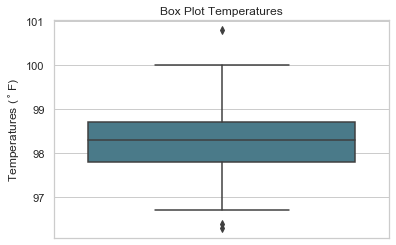

In [73]:
# Generate Box Plot to view differences
_ = sns.boxplot(temperatures, orient='v')
_ = plt.ylabel('Temperatures ($^\circ$F)')
_ = plt.xlabel('')
_ = plt.title('Box Plot Temperatures')

# 6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

130

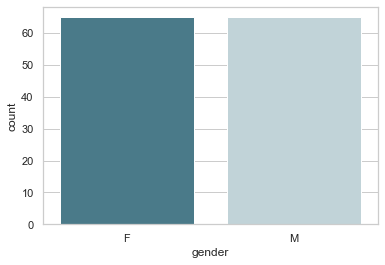

In [82]:
sns.countplot(df['gender'])
len(df['gender'])

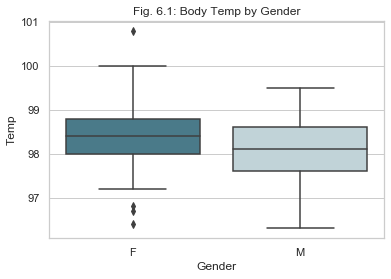

In [90]:
# plot a boxplot for an overview
sns.boxplot(x = 'gender', y = 'temperature', data=df)

_ = plt.xlabel('Gender')
_ = plt.ylabel('Temp')
_ = plt.title('Fig. 6.1: Body Temp by Gender')

plt.show();

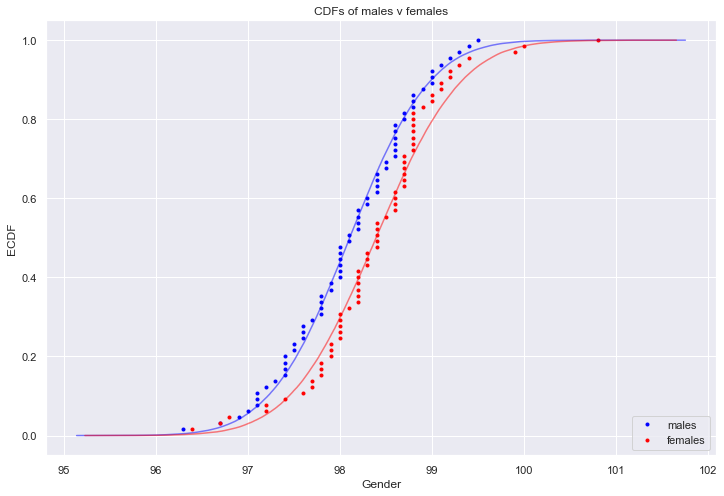

In [98]:
sns.set(rc={"figure.figsize": (12, 8)})

#split male/females into seperate data frames.
males = df[df.gender == 'M']
females = df[df.gender == 'F']

# Compute the ECDFs for males and females
x_male, y_male = ecdf(males.temperature)
x_female, y_female = ecdf(females.temperature)

# Generate plot
plt.plot(x_male, y_male, marker = '.', linestyle = 'none', color='blue')
plt.plot(x_female, y_female, marker='.', linestyle='none', color='red')

# 100,000 random samples from a normal distribution
m_norm_dist = np.random.normal(np.mean(males.temperature), np.std(males.temperature), 100000)
mnd_x, mnd_y = ecdf(m_norm_dist)
_ = plt.plot(mnd_x, mnd_y, color='blue', alpha=0.5)

# 100,000 random samples from a normal distribution
f_norm_dist = np.random.normal(np.mean(females.temperature), np.std(females.temperature), 100000)
fnd_x, fnd_y = ecdf(f_norm_dist)
_ = plt.plot(fnd_x, fnd_y, color='red', alpha=0.5)

# Label the axes
_ = plt.xlabel('Gender')
_ = plt.ylabel('ECDF')
_ = plt.title('CDFs of males v females')
_ = plt.legend(('males', 'females'), loc='lower right')

plt.show()